In [3]:
!pip install opencv-python

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [4]:
from IPython.display import display,Image
import cv2
import base64
from zhipuai import  ZhipuAI
client=ZhipuAI()
video=cv2.VideoCapture("data/movie.mp4")
base64Frames=[]
while video.isOpened():
    success,frame=video.read()
    if not success:
        break
    _,buffer=cv2.imencode(".jpg",frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))
video.release()
print(len(base64Frames),"frame read.")


374 frame read.


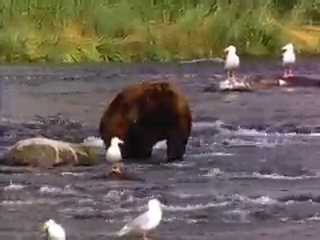

In [5]:
first_image=Image(data=base64.b64decode(base64Frames[100].encode("utf-8")))
display_handle=display(first_image,display_id=True)

In [7]:
PROMPT_MESSAGES=[
    {
        "role":"user",
        "content":[
            {
            "type": "text",
            "text": "这些是我上传的视频的帧。请你根据这些视频祯，进行分析并联系图片的上下文关系，生成引人注目的视频描述。让我们开始吧"
            },
            *[
                {
                    "type":"image_url",
                    "image_url":{
                        "url":frame
                    }
                } for frame in base64Frames[0:50]
            ]
        ]
    }
]

params={
    "model":"glm-4v",
    "messages":PROMPT_MESSAGES,
    "max_tokens":20000,
    "temperature":0.9,
    "top_p":1
}

result=client.chat.completions.create(**params)
print(result.choices[0].message.content)

在这宁静的野生动物场景中，一只棕熊悠然地浸泡在水中，享受凉爽的拥抱。周围环绕着几只机智的海鸥，它们站在熊附近的岩石上或轻轻地在附近漂浮，分享这一片宁静。当熊沉浸在大自然的和谐中时，这些鸟儿为这幅画面带来了活力和生机。这是野生动物之间和平共处的时刻，展示了大自然的美丽和神秘。
